# Outliers

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
titanic=pd.read_csv("Titanic.csv")
titanic.head()

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Passenger Id      714 non-null    int64  
 1   Name              714 non-null    object 
 2   Gender            714 non-null    object 
 3   Age               714 non-null    float64
 4   Ticket No.        714 non-null    object 
 5   Fare              714 non-null    float64
 6   Passenger  Class  714 non-null    object 
 7   Survived          714 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 44.8+ KB


In [6]:
titanic.describe()

,Passenger Id,Age,Fare
count,714.000000,714.000000,714.000000
mean,357.500000,29.697717,34.695294
std,206.258333,14.521688,52.918912
min,1.000000,0.420000,0.000000
25%,179.250000,20.125000,8.050000
50%,357.500000,28.000000,15.740000
75%,535.750000,38.000000,33.375000
max,714.000000,79.000000,512.330000


As we can observe that minimum age is 0.42 maximium age is 79 where as mean and median value is between 28 and 30 and Q3 is 38 which proves that outliers are present in the data.
In Fare case, minimum fare is 0 maximium fare is 512 where as mean = 34.69 and median value = 15.74 and Q3 is 33.37 which proves that outliers are present in the data.

### Plot bell curve along with histogram

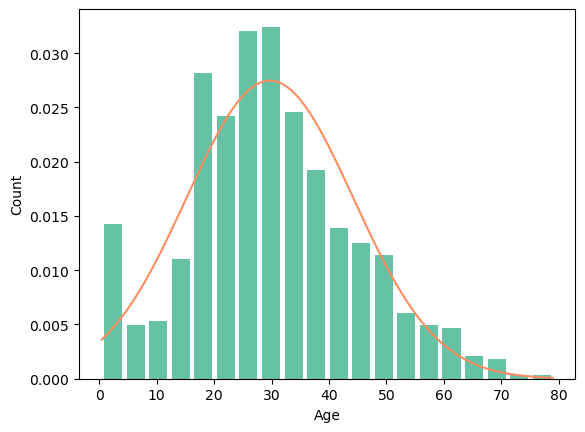

In [73]:
from scipy.stats import norm
import numpy as np
plt.hist(titanic.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(titanic.Age.min(), titanic.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng,titanic.Age.mean(),titanic.Age.std()))

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

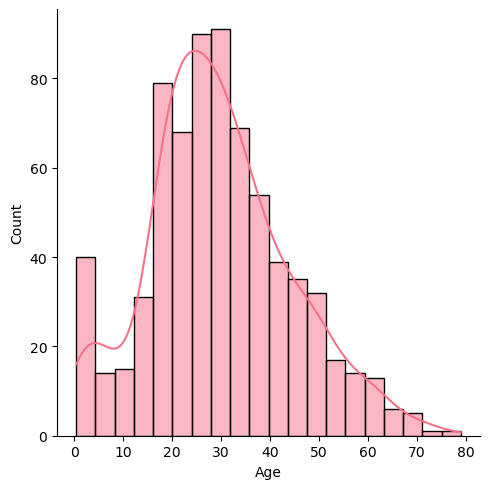

In [36]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=titanic["Age"],kde=True)
plt.show()

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

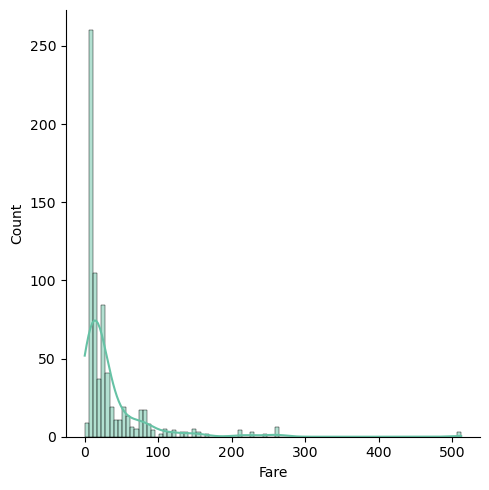

In [37]:
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.displot(x=titanic["Fare"],kde=True)
plt.show()

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


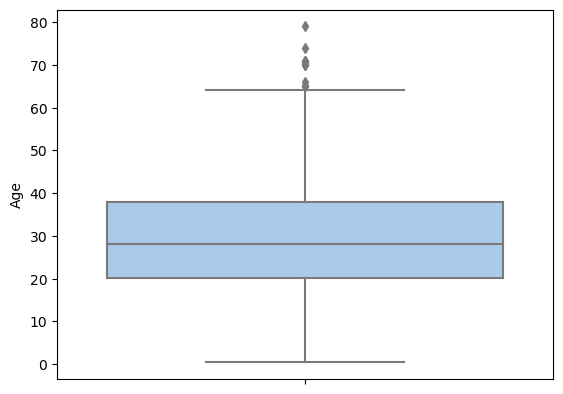

In [39]:
sns.boxplot(y=titanic["Age"], palette="pastel")
plt.show()

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


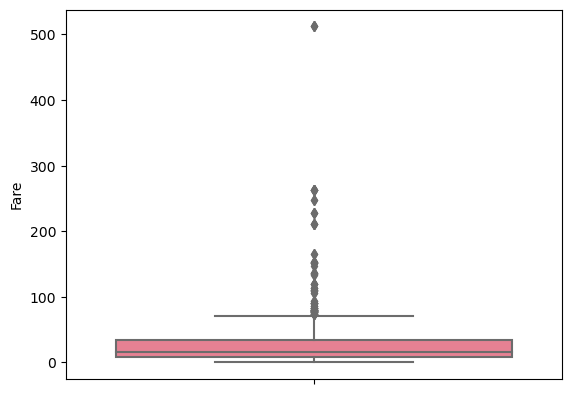

In [38]:
sns.boxplot(y=titanic["Fare"], palette="husl")
plt.show()

# Handling Outliers

## Percentile

In [42]:
max_thres = titanic['Age'].quantile(0.95) # Datapoint which is  95% Quantile
# Anything above this value (56.0) is considered as outlier
max_thres

56.0

In [43]:
titanic[titanic['Age']>max_thres]

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
10,11,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.55,Class 1,Yes
25,26,"Wheadon, Mr. Edward H",male,66.0,C.A. 24579,10.50,Class 2,No
40,41,"Ostby, Mr. Engelhart Cornelius",male,65.0,113509,61.98,Class 1,No
73,74,"Coxon, Mr. Daniel",male,59.0,364500,7.25,Class 3,No
74,75,"Goldschmidt, Mr. George B",male,71.0,PC 17754,34.65,Class 1,No
91,92,"Connors, Mr. Patrick",male,70.5,370369,7.75,Class 3,No
136,137,"Van der hoef, Mr. Wyckoff",male,61.0,111240,33.50,Class 1,No
156,157,"Lurette, Miss. Elise",female,58.0,PC 17569,146.52,Class 1,Yes
187,188,"Sjostedt, Mr. Ernst Adolf",male,59.0,237442,13.50,Class 2,No
203,204,"Stead, Mr. William Thomas",male,62.0,113514,26.55,Class 1,No


In [44]:
min_thres = titanic['Age'].quantile(0.05) # Datapoint which is  5% Quantile
# Anything below this value (56.0) is considered as outlier
min_thres

4.0

In [46]:
titanic[titanic['Age']<min_thres]

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
6,7,"Palsson, Master. Gosta Leonard",male,2.00,349909,21.08,Class 3,No
15,16,"Rice, Master. Eugene",male,2.00,382652,29.13,Class 3,No
33,34,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,SC/Paris 2123,41.58,Class 2,Yes
59,60,"Caldwell, Master. Alden Gates",male,0.83,248738,29.00,Class 2,Yes
94,95,"Andersson, Miss. Ellis Anna Maria",female,2.00,347082,31.28,Class 3,No
132,133,"Panula, Master. Eino Viljami",male,1.00,3101295,39.69,Class 3,No
138,139,"Johnson, Miss. Eleanor Ileen",female,1.00,347742,11.13,Class 3,Yes
146,147,"Becker, Master. Richard F",male,1.00,230136,39.00,Class 2,Yes
154,155,"Navratil, Master. Michel M",male,3.00,230080,26.00,Class 2,Yes
163,164,"Strom, Miss. Telma Matilda",female,2.00,347054,10.46,Class 3,No


In [52]:
titanic_p = titanic[(titanic_p['Age']<max_thres) & (titanic['Age']>min_thres)]

In [53]:
titanic_p.head()

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No


In [54]:
titanic_p.shape

(635, 8)

In [56]:
min_thresF, max_thresF = titanic.Fare.quantile([0.05, 0.95])
min_thresF, max_thresF

(7.23, 120.0)

In [57]:
titanic[(titanic_p['Fare']<max_thresF) & (titanic['Fare']>min_thresF)]

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No
...,...,...,...,...,...,...,...,...
709,710,"Rice, Mrs. William (Margaret Norton)",female,39.0,382652,29.13,Class 3,No
710,711,"Montvila, Rev. Juozas",male,27.0,211536,13.00,Class 2,No
711,712,"Graham, Miss. Margaret Edith",female,19.0,112053,30.00,Class 1,Yes
712,713,"Behr, Mr. Karl Howell",male,26.0,111369,30.00,Class 1,Yes


In [64]:
titanic_PB=titanic_p
titanic_PB

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No
...,...,...,...,...,...,...,...,...
709,710,"Rice, Mrs. William (Margaret Norton)",female,39.0,382652,29.13,Class 3,No
710,711,"Montvila, Rev. Juozas",male,27.0,211536,13.00,Class 2,No
711,712,"Graham, Miss. Margaret Edith",female,19.0,112053,30.00,Class 1,Yes
712,713,"Behr, Mr. Karl Howell",male,26.0,111369,30.00,Class 1,Yes


In [65]:
titanic_PB = titanic_p[(titanic_p['Fare']<max_thresF) & (titanic_p['Fare']>min_thresF)]

In [66]:
titanic_PB.shape

(557, 8)

In [67]:
titanic_PB.head()

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


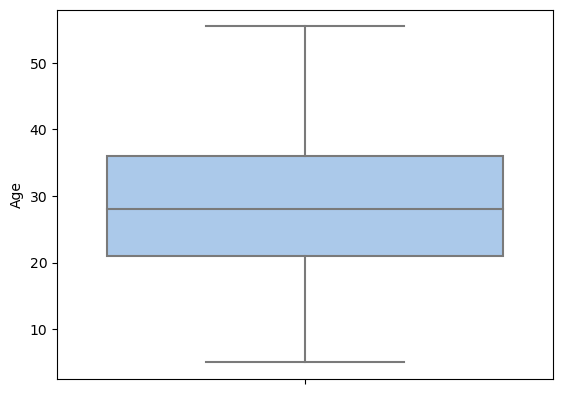

In [69]:
sns.boxplot(y=titanic_PB["Age"], palette="pastel")
plt.show()

We have removed outliers from Age column

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


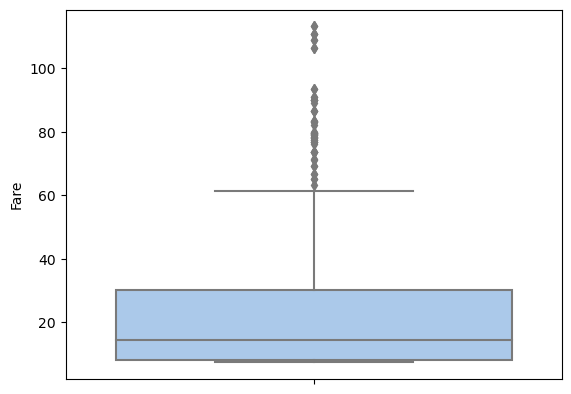

In [70]:
sns.boxplot(y=titanic_PB["Fare"], palette="pastel")
plt.show()

In [72]:
titanic.describe()

,Passenger Id,Age,Fare
count,714.000000,714.000000,714.000000
mean,357.500000,29.697717,34.695294
std,206.258333,14.521688,52.918912
min,1.000000,0.420000,0.000000
25%,179.250000,20.125000,8.050000
50%,357.500000,28.000000,15.740000
75%,535.750000,38.000000,33.375000
max,714.000000,79.000000,512.330000


In [71]:
titanic_PB.describe()

,Passenger Id,Age,Fare
count,557.000000,557.000000,557.000000
mean,355.062837,29.390485,25.657002
std,206.266673,11.124081,24.025543
min,1.000000,5.000000,7.250000
25%,176.000000,21.000000,8.050000
50%,359.000000,28.000000,14.450000
75%,530.000000,36.000000,30.000000
max,714.000000,55.500000,113.280000


As we removed the outliers using percentile method for Fare column its mean, stddev, min, max values etc has changed due to which we again have an outliers as the dataset is highly skewed.
If we remove outliers again there will be loss data.

# Standard Deviation

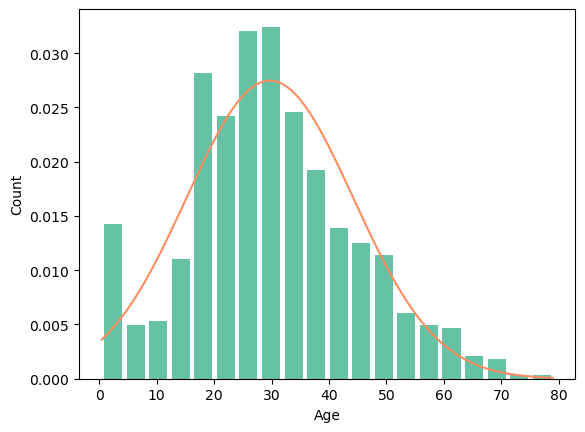

In [74]:
from scipy.stats import norm
import numpy as np
plt.hist(titanic.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(titanic.Age.min(), titanic.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng,titanic.Age.mean(),titanic.Age.std()))

In [76]:
titanic.Age.describe()

count    714.000000
mean      29.697717
std       14.521688
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       79.000000
Name: Age, dtype: float64

In [81]:
titanic.Age.mean()

29.697717086834732

In [77]:
titanic.Age.std()

14.52168822356218

In [85]:
30+3*14.52

73.56

In [82]:
30-3*14.52

-13.560000000000002

While removing outliers using Standard Deviation is remove any data points that are beyond 1 sd(68%) or 2sd(95%) or 3sd(99.7) from mean
Lets remove data points that are beyond 3 standard deviation from mean for which we have to set upper limit and lower limit.

In [78]:
upper_limit = titanic.Age.mean() + 3*titanic.Age.std()
upper_limit

73.26278175752127

In [80]:
lower_limit = titanic.Age.mean() - 3*titanic.Age.std()
lower_limit

-13.867347583851807

In [84]:
# Lets see the Outliers
titanic[(titanic.Age>upper_limit) | (titanic.Age<lower_limit)]

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
498,499,"Barkworth, Mr. Algernon Henry Wilson",male,79.0,27042,30.00,Class 1,Yes
679,680,"Svensson, Mr. Johan",male,74.0,347060,7.78,Class 3,No


In [87]:
# we got two outliers where age is above upper limit (73.26) 
# Lets remove them we can drop them using iloc or just exclued them like we did above
titanic_std_dev = titanic[(titanic.Age<upper_limit) & (titanic.Age>lower_limit)]
titanic_std_dev.head()

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No


In [88]:
titanic_std_dev.shape

(712, 8)

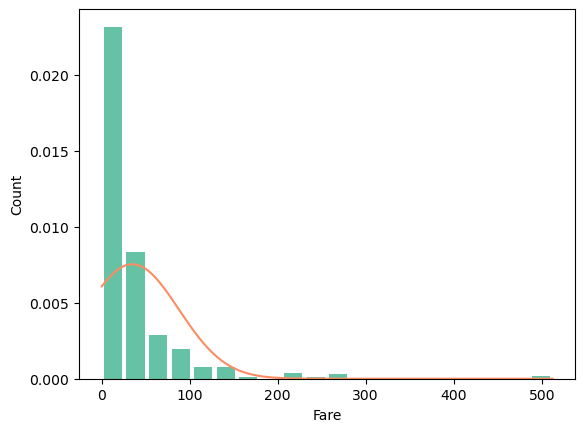

In [89]:
# Lets try to same with Fare which is heavily rightly skewed
from scipy.stats import norm
import numpy as np
plt.hist(titanic.Fare, bins=20, rwidth=0.8, density=True)
plt.xlabel('Fare')
plt.ylabel('Count')

rng = np.arange(titanic.Fare.min(), titanic.Fare.max(), 0.1)
plt.plot(rng, norm.pdf(rng,titanic.Fare.mean(),titanic.Fare.std()))

In [91]:
titanic.Fare.describe()

count    714.000000
mean      34.695294
std       52.918912
min        0.000000
25%        8.050000
50%       15.740000
75%       33.375000
max      512.330000
Name: Fare, dtype: float64

In [92]:
upper_limit = titanic.Fare.mean() + 3*titanic.Fare.std()
upper_limit

193.45202962823174

In [93]:
lower_limit = titanic.Fare.mean() - 3*titanic.Fare.std()
lower_limit

-124.06144139293764

In [94]:
# Lets see the Outliers
titanic[(titanic.Fare>upper_limit) | (titanic.Fare<lower_limit)]

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
23,24,"Fortune, Mr. Charles Alexander",male,19.0,19950,263.00,Class 1,No
67,68,"Fortune, Miss. Mabel Helen",female,23.0,19950,263.00,Class 1,Yes
93,94,"Baxter, Mr. Quigg Edmond",male,24.0,PC 17558,247.52,Class 1,No
208,209,"Ward, Miss. Anna",female,35.0,PC 17755,512.33,Class 1,Yes
241,242,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,PC 17558,247.52,Class 1,Yes
248,249,"Ryerson, Miss. Emily Borie",female,18.0,PC 17608,262.38,Class 1,Yes
274,275,"Fortune, Miss. Alice Elizabeth",female,24.0,19950,263.00,Class 1,Yes
301,302,"Widener, Mr. Harry Elkins",male,27.0,113503,211.50,Class 1,No
304,305,"Bidois, Miss. Rosalie",female,42.0,PC 17757,227.53,Class 1,Yes
351,352,"Fortune, Mr. Mark",male,64.0,19950,263.00,Class 1,No


In [98]:
# Lets remove outliers we can drop them using iloc or just exclued them like we did above
titanic_std_dev = titanic[(titanic.Fare<upper_limit) & (titanic.Fare>lower_limit)]
titanic_std_dev.head()

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No


In [101]:
titanic_std_dev.shape

(696, 8)

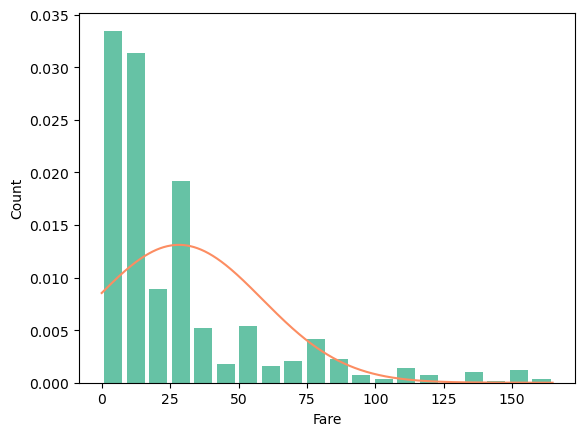

In [102]:
# Lets try to same with Fare which is heavily rightly skewed
from scipy.stats import norm
import numpy as np
plt.hist(titanic_std_dev.Fare, bins=20, rwidth=0.8, density=True)
plt.xlabel('Fare')
plt.ylabel('Count')

rng = np.arange(titanic_std_dev.Fare.min(), titanic_std_dev.Fare.max(), 0.1)
plt.plot(rng, norm.pdf(rng,titanic_std_dev.Fare.mean(),titanic_std_dev.Fare.std()))

I think i should remove ouliers from Age column as fare is rightly skewed

# Z - Score

Z score indicates how many std dev away the datapoint is from the mean for example if datapoint is 3sd away from the mean than z score is 3

In [4]:
titanic_z = titanic
titanic_z.head()

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No


In [5]:
titanic_z.describe()

,Passenger Id,Age,Fare
count,714.000000,714.000000,714.000000
mean,357.500000,29.697717,34.695294
std,206.258333,14.521688,52.918912
min,1.000000,0.420000,0.000000
25%,179.250000,20.125000,8.050000
50%,357.500000,28.000000,15.740000
75%,535.750000,38.000000,33.375000
max,714.000000,79.000000,512.330000


In [6]:
# Calculating Z-Score
(22 - 29.697)/14.52

-0.5300964187327823

In [7]:
titanic_z['z_score'] = (titanic_z['Age'] - titanic_z['Age'].mean()) / titanic_z['Age'].std()
titanic_z.head()

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived,z_score
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No,-0.530084
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes,0.571716
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes,-0.254634
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes,0.365129
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No,0.365129


In [8]:
titanic_filter = titanic_z[titanic_z['z_score'] > 3]
titanic_filter

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived,z_score
498,499,"Barkworth, Mr. Algernon Henry Wilson",male,79.0,27042,30.00,Class 1,Yes,3.395079
679,680,"Svensson, Mr. Johan",male,74.0,347060,7.78,Class 3,No,3.050767


Same Above Process will be repeated

# InterQuartile Range

In [23]:
Q1 = titanic.Age.quantile(0.25) # 25 percentile
Q3 = titanic.Age.quantile(0.75) # 75 percentile
print("25 percentile: ", Q1,"\n75 percentile: ",Q3)

25 percentile:  20.125 
75 percentile:  38.0


In [24]:
IQR = Q3 - Q1 # Calculating InterQuartile Range
IQR

17.875

In [25]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-6.6875, 64.8125)

Detecting Outliers using IQR

In [26]:
# Lets see the Outliers
titanic[(titanic.Age>upper_limit) | (titanic.Age<lower_limit)]

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
25,26,"Wheadon, Mr. Edward H",male,66.0,C.A. 24579,10.50,Class 2,No
40,41,"Ostby, Mr. Engelhart Cornelius",male,65.0,113509,61.98,Class 1,No
74,75,"Goldschmidt, Mr. George B",male,71.0,PC 17754,34.65,Class 1,No
91,92,"Connors, Mr. Patrick",male,70.5,370369,7.75,Class 3,No
225,226,"Duane, Mr. Frank",male,65.0,336439,7.75,Class 3,No
366,367,"Millet, Mr. Francis Davis",male,65.0,13509,26.55,Class 1,No
393,394,"Artagaveytia, Mr. Ramon",male,71.0,PC 17609,49.50,Class 1,No
498,499,"Barkworth, Mr. Algernon Henry Wilson",male,79.0,27042,30.00,Class 1,Yes
531,532,"Mitchell, Mr. Henry Michael",male,70.0,C.A. 24580,10.50,Class 2,No
592,593,"Crosby, Capt. Edward Gifford",male,70.0,WE/P 5735,71.00,Class 1,No


In [27]:
# Lets remove outliers we can drop them using iloc or just exclued them like we did above
titanic_iqr = titanic[(titanic.Age<upper_limit) & (titanic.Age>lower_limit)]
titanic_iqr.head()

,Passenger Id,Name,Gender,Age,Ticket No.,Fare,Passenger Class,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,Class 3,No
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.28,Class 1,Yes
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.93,Class 3,Yes
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.10,Class 1,Yes
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.05,Class 3,No


In [28]:
print({"titanic": titanic.shape,"titanic_iqr":titanic_iqr.shape})

{'titanic': (714, 8), 'titanic_iqr': (703, 8)}


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

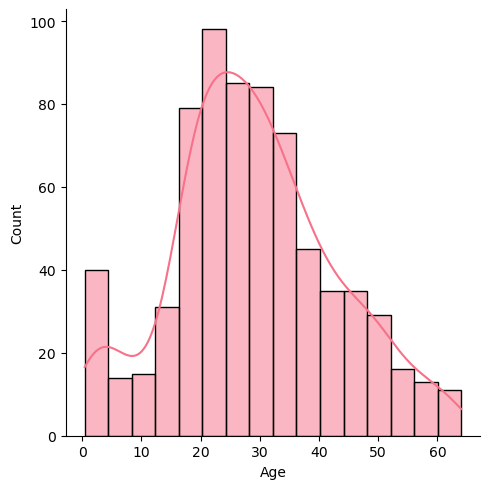

In [40]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=titanic_iqr["Age"],kde=True)
plt.show()

 Here we are done with removing outliers from Age Column